## Fitting your test set: *bad*

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# load and split the data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# scale the data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

### Example: Covariate shift

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

# initialize a random state
rs = np.random.RandomState(42)
X = rs.normal(25., 7., (1000, 3))
y = X[:, -1] >= 35.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs, 
                                                    test_size=0.25,
                                                    stratify=y)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

# Fit, predict
clf = LogisticRegression().fit(X_train_scaled, y_train)
preds = clf.predict(X_test_scaled)
print("Test accuracy: %.3f" % accuracy_score(y_test, preds))

Test accuracy: 0.988


But what happens when new data comes into your system (and may have shifted?)

In [22]:
# here's the new data coming in. let's pretend the last feature
# has drifted upward for some reason
X_new_data = np.random.RandomState(100).normal(25., 7., (500, 3))
X_new_data[:, -1] *= 5.

# and now let's score the model
X_new_data_scaled = StandardScaler().fit_transform(X_new_data)
preds = clf.predict(X_new_data_scaled)

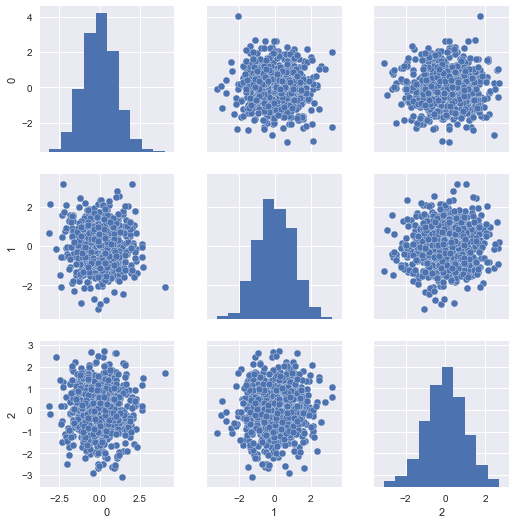

In [26]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X_train_scaled))

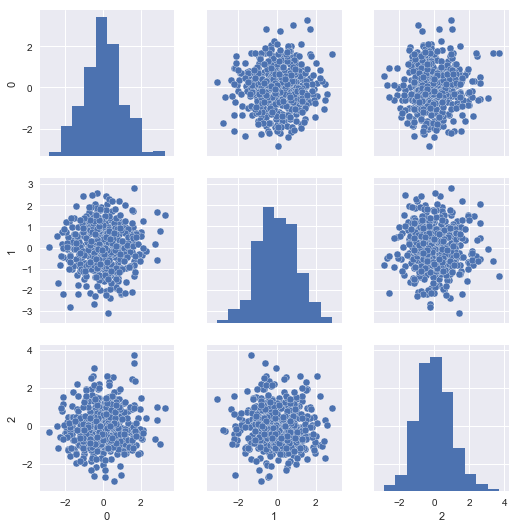

In [27]:
sns.pairplot(pd.DataFrame(X_new_data_scaled))

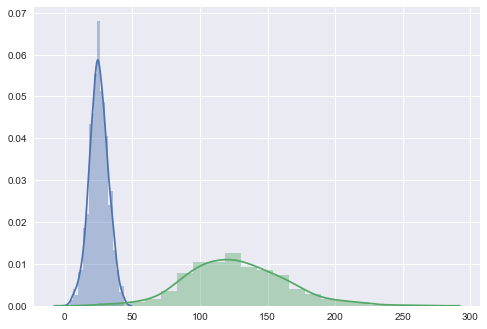

In [37]:
sns.distplot(pd.DataFrame(X_train[:, -1]), kde=True)
sns.distplot(pd.DataFrame(X_new_data[:, -1]), kde=True)

### Preventing this problem


In [43]:
from sklearn.pipeline import Pipeline

# stuff it all into a pipe
pipe = Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression())
]).fit(X_train, y_train)

# apply the pipe directly to your test data
test_preds = pipe.predict(X_test)
new_preds = pipe.predict(X_new_data)

# we should have roughly the same test accuracy:
print("Test accuracy: %.5f" 
      % accuracy_score(y_test, test_preds))

# and we should have predicted True for more
# than 7% of the "new" data
print("{0}% predicted True".format(
    new_preds.sum() / new_preds.shape[0] *100))

Test accuracy: 0.99200
99.2% predicted True
